                                                    TITTLE
                                Feature Extraction and Price Prediction for Mobile Phones

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

                                                 Loading the Data

In [4]:
df=pd.read_excel(r"C:\Users\Latha\Downloads\Processed_Flipdata.xlsx")

                                                 Data Exploration

In [6]:
df.head() # it's Displaying first few rows

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [10]:
df.tail() # it's Displaying bottom few rows 

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999
540,642,OPPO A77,Sky Blue,128,4,5000,50MP,8MP,0,16.66,Mediatek Helio G35,15999


In [12]:
df #it displays all the columns and few rows inthe data sets along with row,coumn count

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


In [14]:
print(df.columns) #it displaying all the column names

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')


In [16]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# dropping unnamed column

In [18]:
df.shape #it's diplays shape of row and columns

(541, 11)

In [20]:
df.dtypes #it displays datatypes

Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize              int64
dtype: object

In [22]:
df.info() #checking the basic information of each row and column wise(data types, null values, row/column counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.6+ KB


In [24]:
print(df.describe()) 
# it shows the Statastical analysis of data

           Memory         RAM     Battery_     AI Lens  Mobile Height  \
count  541.000000  541.000000   541.000000  541.000000     541.000000   
mean   110.550832    5.397412  4871.587800    0.062847      16.431201   
std     60.600694    1.984923   780.148862    0.242911       2.523553   
min     16.000000    2.000000   800.000000    0.000000       4.500000   
25%     64.000000    4.000000  5000.000000    0.000000      16.510000   
50%    128.000000    6.000000  5000.000000    0.000000      16.710000   
75%    128.000000    8.000000  5000.000000    0.000000      16.940000   
max    256.000000    8.000000  7000.000000    1.000000      41.940000   

              Prize  
count    541.000000  
mean   16228.375231  
std    10793.588322  
min      920.000000  
25%     9290.000000  
50%    13499.000000  
75%    19280.000000  
max    80999.000000  


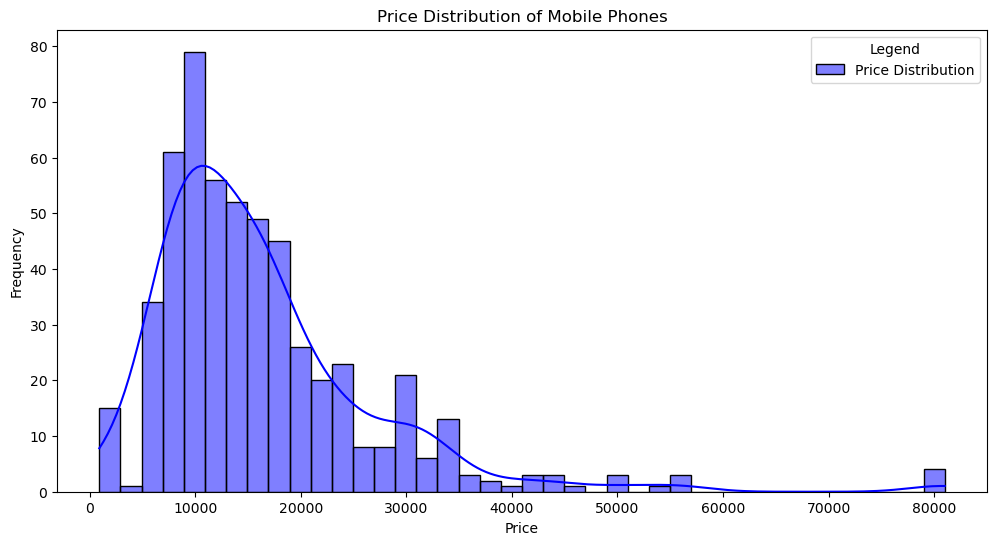

In [26]:
# Visualize the distribution of mobile prices
plt.figure(figsize=(12, 6))
sns.histplot(df['Prize'], kde=True, color='blue', bins=40, label='Price Distribution')
plt.title('Price Distribution of Mobile Phones')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(title='Legend', loc='upper right')
plt.show()

1.The price distribution histogram shows the prices are evenly distributed.

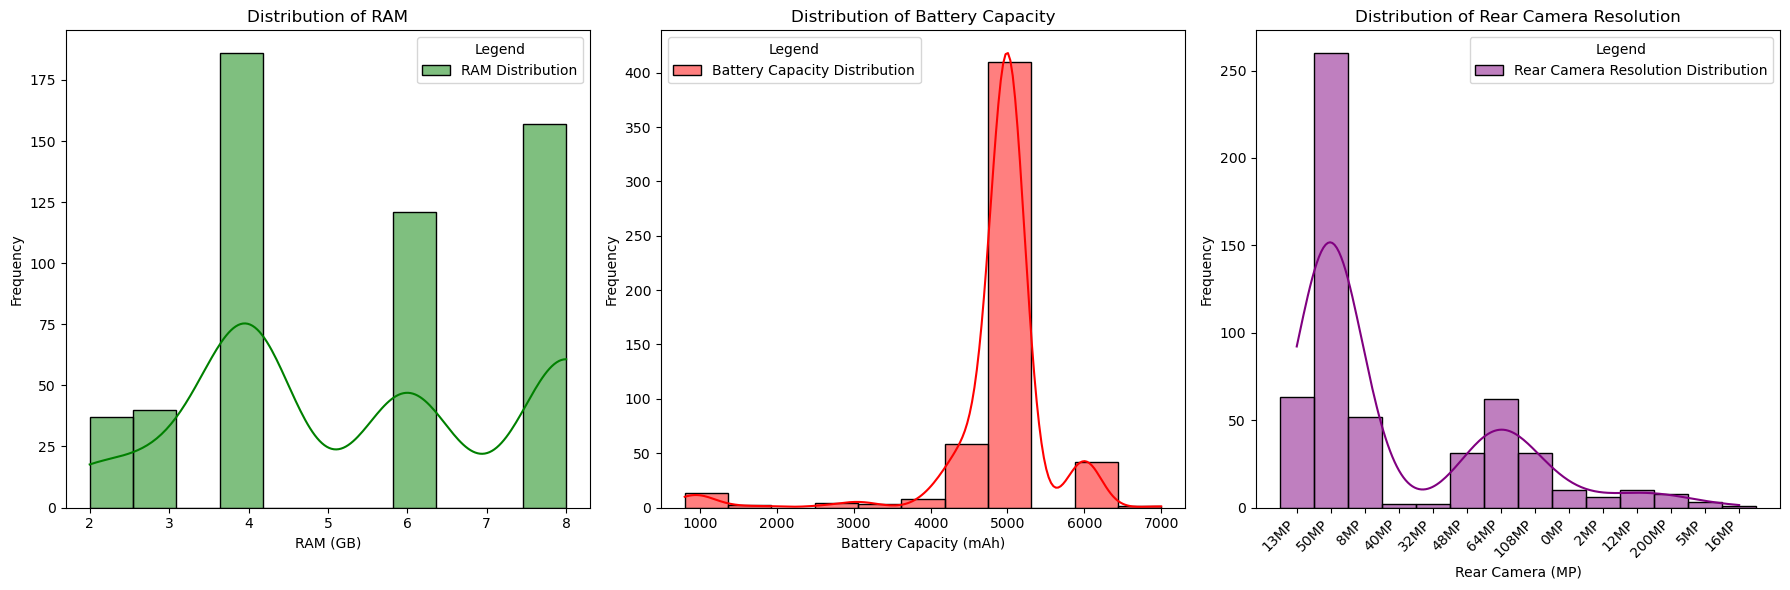

In [29]:
# Visualize the distribution of key numeric features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(df['RAM'], kde=True, ax=axes[0], color='green', label='RAM Distribution')
sns.histplot(df['Battery_'], kde=True, ax=axes[1], color='red', label='Battery Capacity Distribution')
sns.histplot(df['Rear Camera'], kde=True, ax=axes[2], color='purple', label='Rear Camera Resolution Distribution')
axes[0].set_title('Distribution of RAM') 
axes[1].set_title('Distribution of Battery Capacity')
axes[2].set_title('Distribution of Rear Camera Resolution')
# Set x and y axis labels
axes[0].set_xlabel('RAM (GB)')
axes[0].set_ylabel('Frequency')
axes[1].set_xlabel('Battery Capacity (mAh)')
axes[1].set_ylabel('Frequency')
axes[2].set_xlabel('Rear Camera (MP)')
axes[2].set_ylabel('Frequency')

# Rotate the x-axis labels of the third subplot (axes[2])
for label in axes[2].get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

# adding the legends
axes[0].legend(title='Legend', loc='upper right')
axes[1].legend(title='Legend', loc='upper left')
axes[2].legend(title='Legend', loc='upper right')
plt.tight_layout()
plt.show()

1.the histograms show skewed distributions, it implies that certain features (e.g., RAM, battery capacity, camera resolution) have a certain trends in  the market

2.RAM, Battery Capacity, and Rear Camera Resolution are crucial features affecting consumer decisions when purchasing mobile phones.

                                                    Handle Missing Data

In [33]:
df.isnull().sum()# Checking for missing values in each column wise

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [39]:
df.fillna(df.mean(numeric_only=True), inplace=True)# Handling missing values by filling numerical columns with the mean

C:\Users\Latha\AppData\Local\Temp\ipykernel_4700\1160710594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(numeric_only=True), inplace=True)# Handling missing values by filling numerical columns with the mean


In [41]:
df.fillna(df.mode().iloc[0], inplace=True)#handling missing categorical values with the mode

C:\Users\Latha\AppData\Local\Temp\ipykernel_4700\3682900721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mode().iloc[0], inplace=True)#handling missing categorical values with the mode


In [43]:
# Checking for duplicate values
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 10


In [45]:
df = df.drop_duplicates()# Removing the duplicates (if any in dataset)

One-hot encoding for categorical features

(We can convert categorical variables into numerical values by using One-Hot Encoding)

In [48]:
df=pd.read_excel(r"C:\Users\Latha\Downloads\Processed_Flipdata.xlsx")

In [50]:
df = pd.get_dummies(df, columns=['Colour', 'Processor_','Rear Camera', 'Front Camera','Model'], drop_first=True)
# Applying One-Hot Encoding to specific categorical columns in loaded data set

In [52]:
# Log transform to reduce skewness
df['Prize'] = df['Prize'].apply(lambda x: np.log(x + 1))
 # Log transform battery capacity
df['Battery_'] = df['Battery_'].apply(lambda x: np.log(x + 1)) 

In [54]:
df.columns  #checking column names after one-hot encoding implementation

Index(['Unnamed: 0', 'Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height',
       'Prize', 'Colour_Agate Black', 'Colour_Alpine White',
       'Colour_Aqua Blue',
       ...
       'Model_vivo Y100 5G', 'Model_vivo Y12G', 'Model_vivo Y16',
       'Model_vivo Y1s', 'Model_vivo Y21T', 'Model_vivo Y33s',
       'Model_vivo Y35', 'Model_vivo Y56 5G', 'Model_vivo Y565G',
       'Model_vivo Y75'],
      dtype='object', length=614)

                                                        Outliers

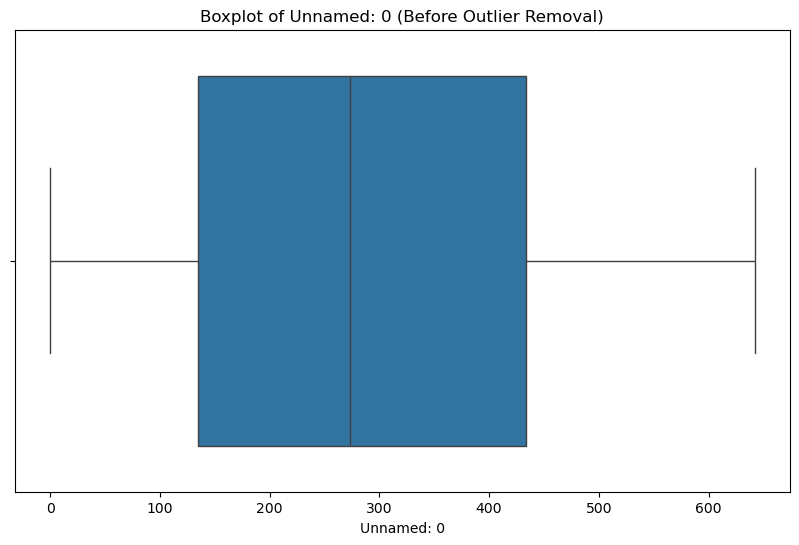

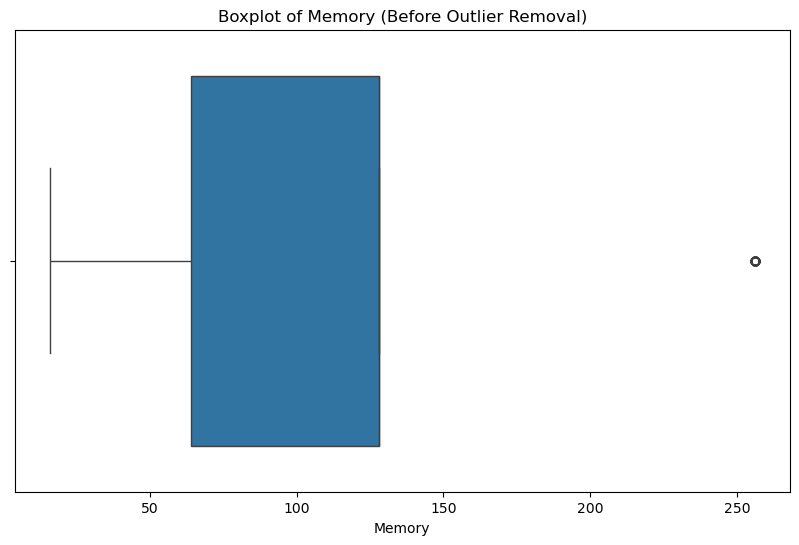

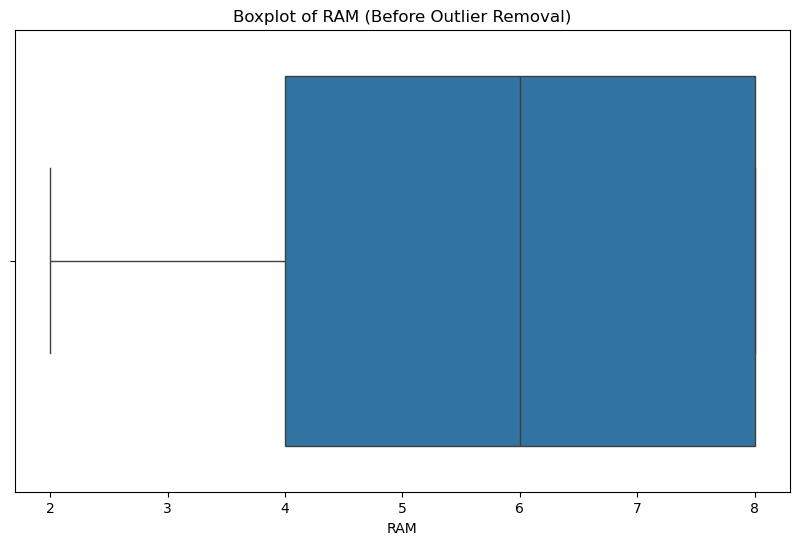

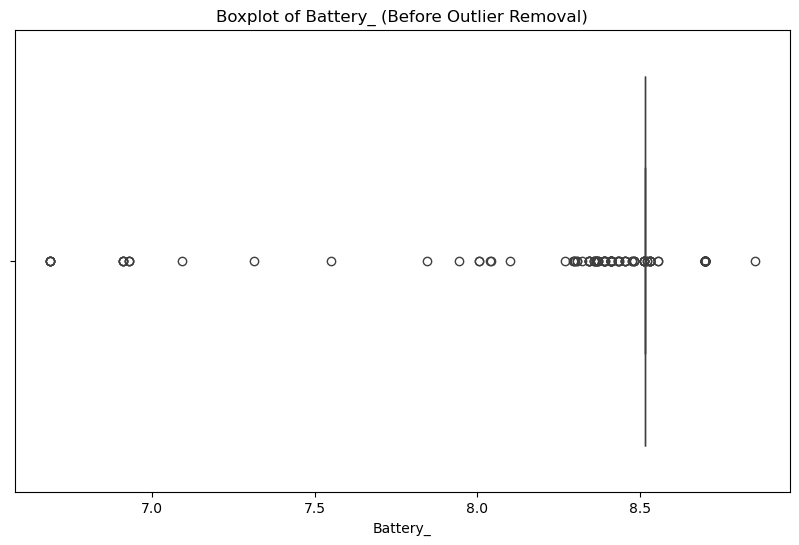

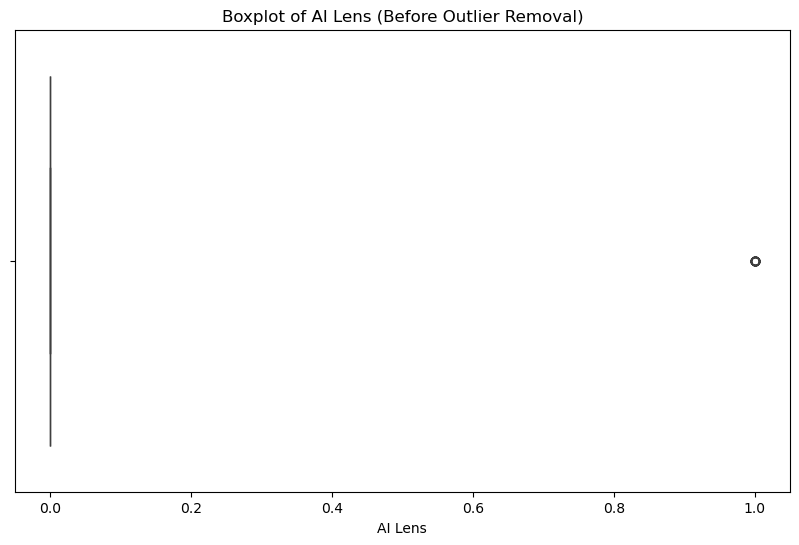

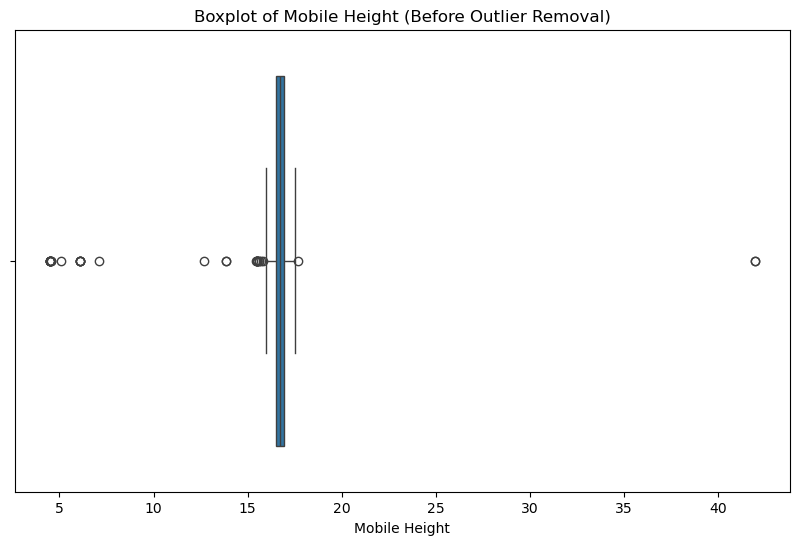

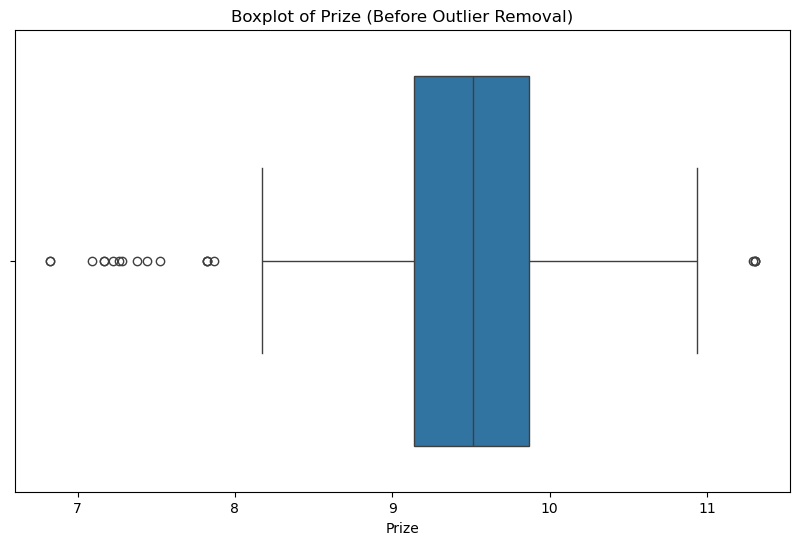

In [57]:
# using IQR method to identify/handle the outliers 
def remove_outliers(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR # Calculating lower and upper bounds for outliers
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Visualizing boxplots before removing outliers
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} (Before Outlier Removal)')
    plt.xlabel(column)
    plt.show()

In [58]:
df_cleaned = remove_outliers(df)# Removing the outliers from the mobile data

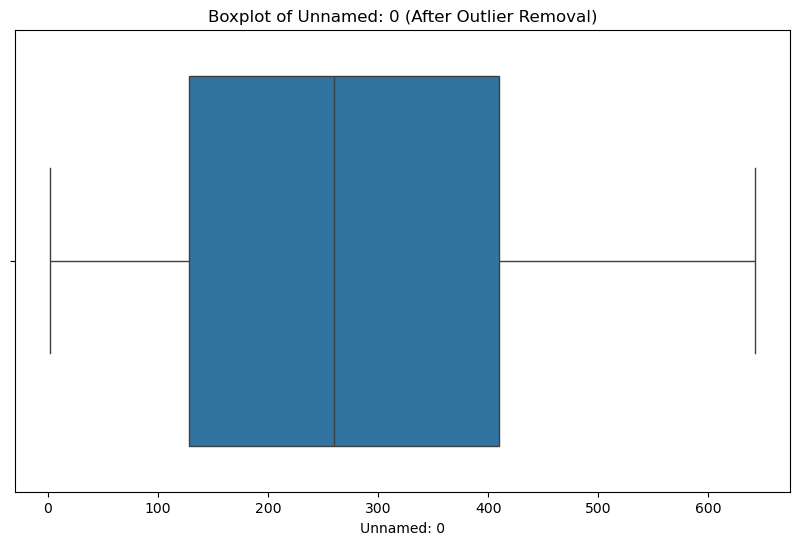

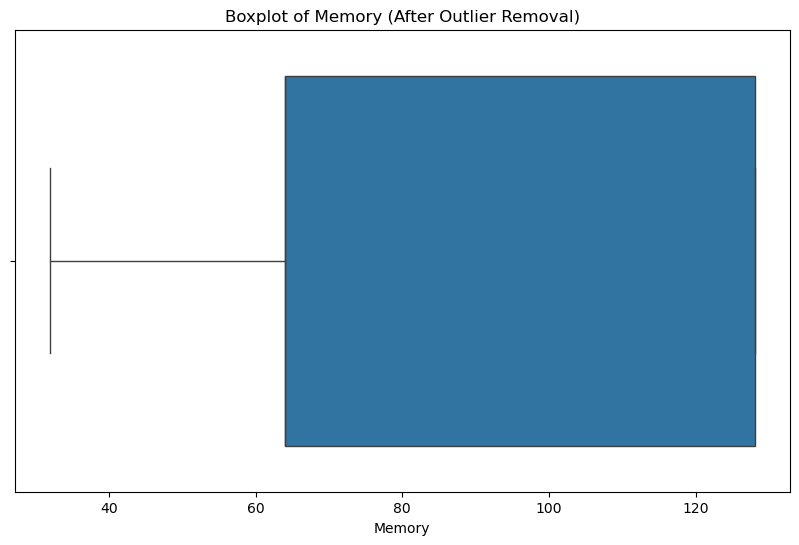

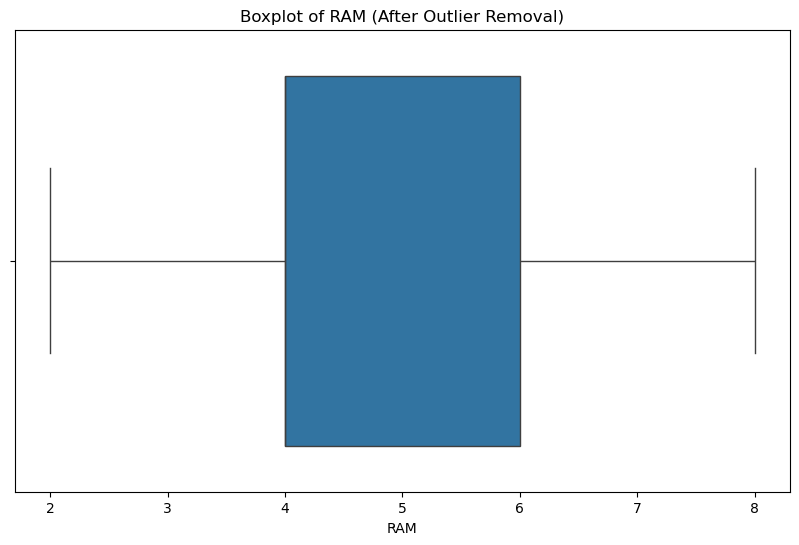

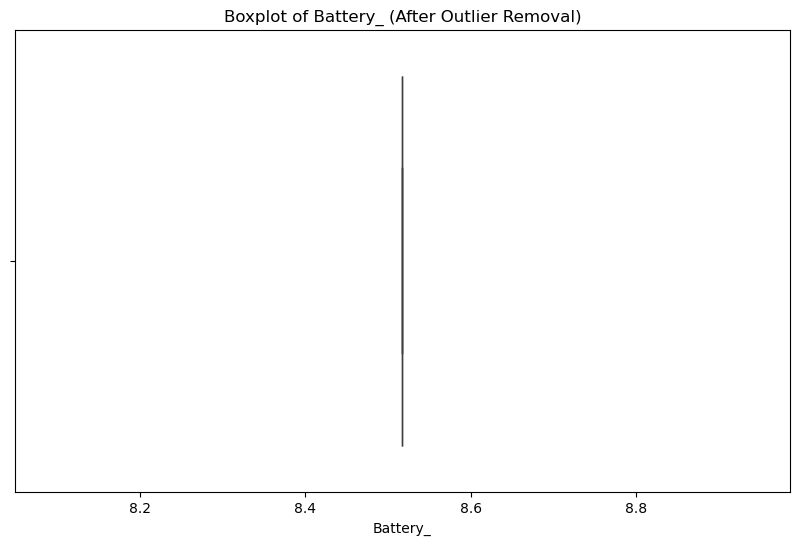

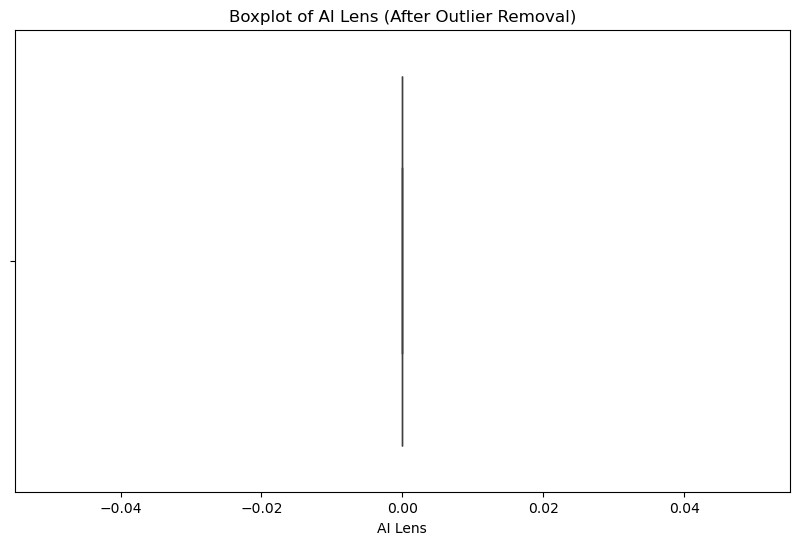

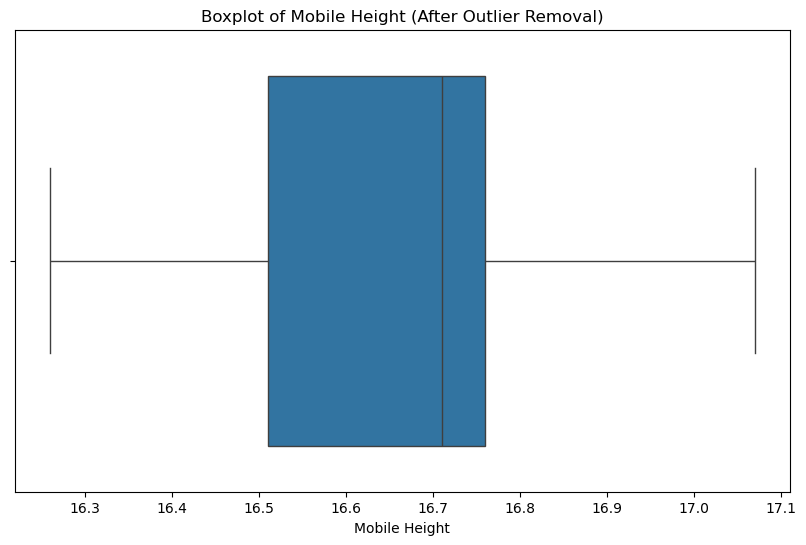

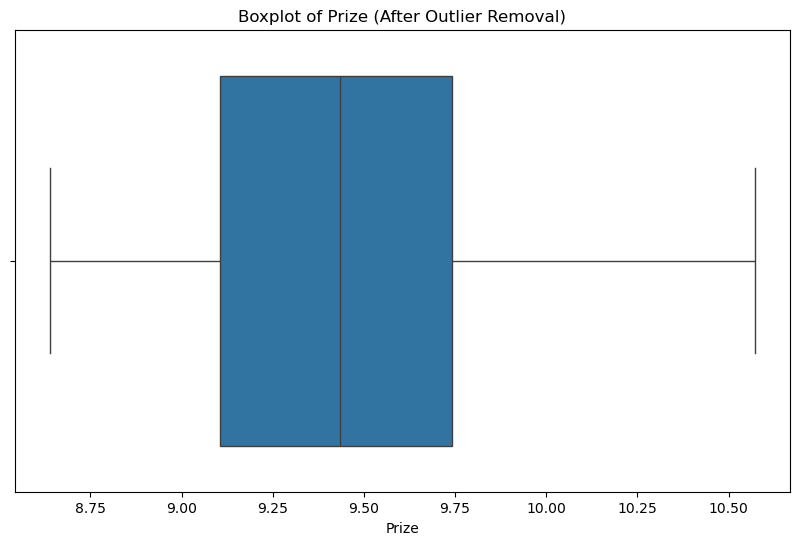

In [61]:
# Visualizing boxplots after removing outliers
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_cleaned[column])
    plt.title(f'Boxplot of {column} (After Outlier Removal)')
    plt.xlabel(column)
    plt.show()

                                                    Feature Extraction

 Correlation Analysis

In [65]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# dropping unnamed column 

In [67]:
numeric_df = df.select_dtypes(include=['number'])
#calculating the correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)


                 Memory       RAM  Battery_   AI Lens  Mobile Height     Prize
Memory         1.000000  0.625284 -0.019908 -0.094442       0.063163  0.586545
RAM            0.625284  1.000000 -0.043679 -0.082622       0.092951  0.596708
Battery_      -0.019908 -0.043679  1.000000  0.102839       0.754299  0.434687
AI Lens       -0.094442 -0.082622  0.102839  1.000000       0.052018 -0.144971
Mobile Height  0.063163  0.092951  0.754299  0.052018       1.000000  0.462896
Prize          0.586545  0.596708  0.434687 -0.144971       0.462896  1.000000


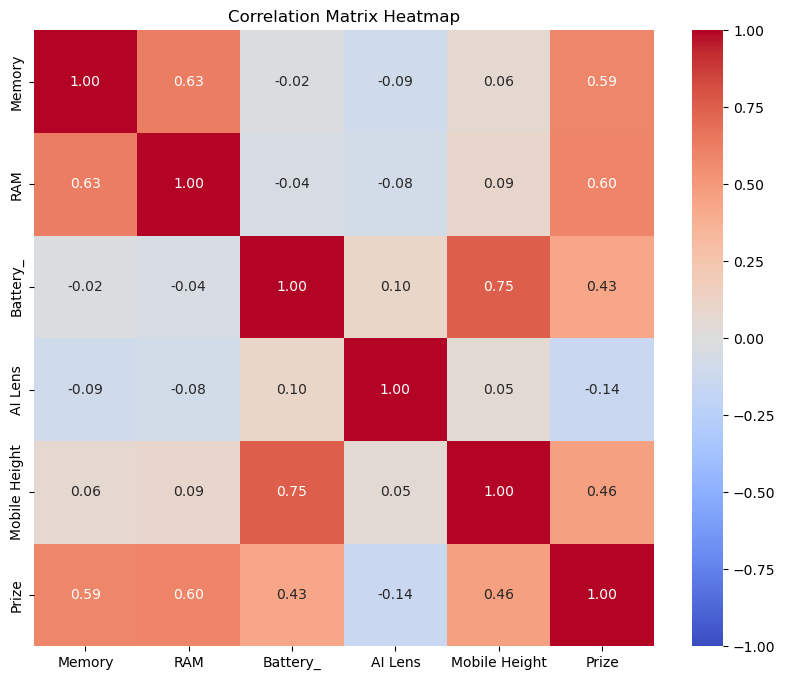

In [69]:
# plotting the heatmap using seaborn
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

1.Above correlation analysis to identify which features have the strongest relationships                                                                 
2.Variables that show light colors on the heatmap have weak or no correlation, These variables are relatively independent of each other.                                                                                                                    


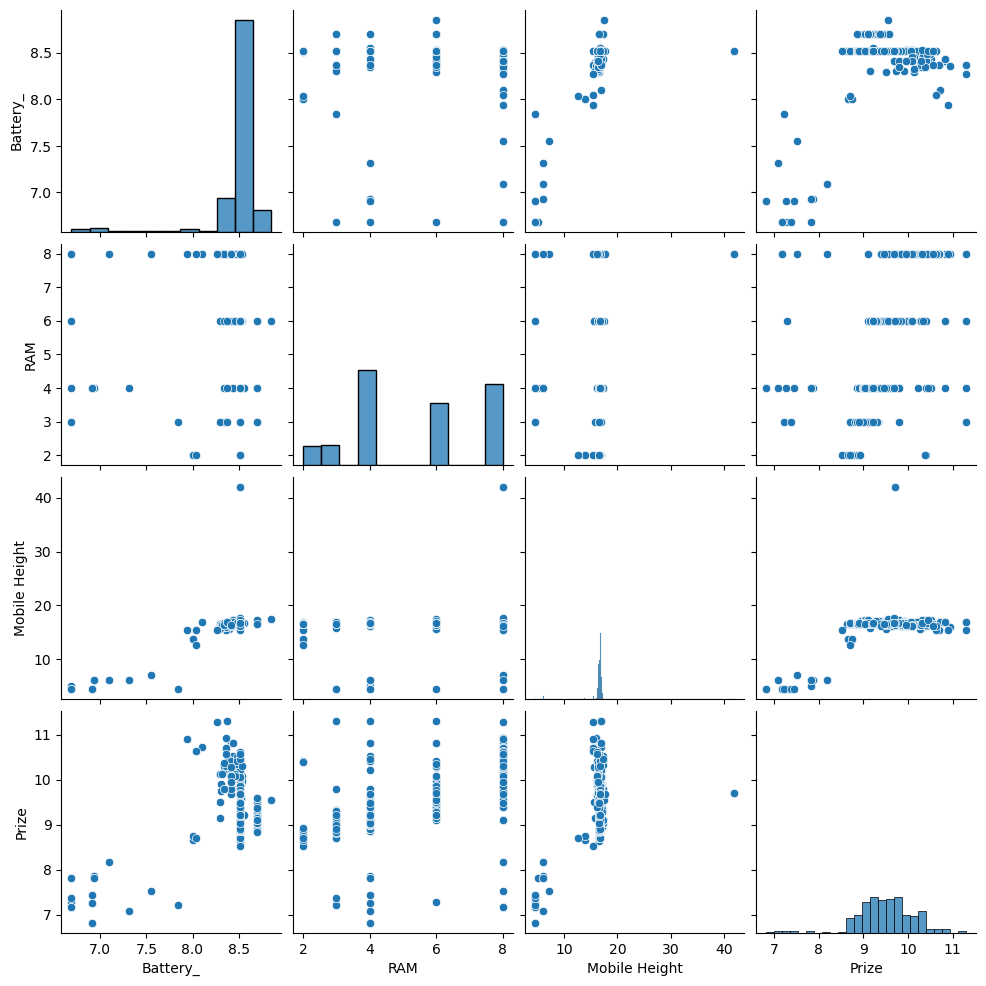

In [72]:
# Select the numerical columns
numerical_columns = ['Battery_', 'RAM', 'Mobile Height', 'Prize']

# implementing Pair plot for relationships between the numerical columns
sns.pairplot(df[numerical_columns])
plt.show()


The Above scatter plots in the lower triangle of the pair plot show how each pair of variables correlates.                                               
scatter plot between Battery_ and Prize shows a linear upward trend, it suggests that higher battery capacity is associated with higher prices.       

                                                     Model Building


In [76]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

Train-Test Split(before applying the regression models, here i am spliting the data into training and test sets)

In [79]:
X = df.drop('Prize', axis=1) #Define the target variable (price) and features (X)
y = df['Prize']

In below steps Spliting data into 80% training and 20% testing to perform models

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression Model Evaluation

In [85]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)# Predict on the test set
# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
# Compute MSE and then calculate RMSE
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
# R-squared (R2) score using the model's score method
r2_lr = r2_score(y_test, y_pred_lr)
# Get the model's R² score directly from the model
model_score = lr_model.score(X_test, y_test)  # Model score (R² value)
# Print evaluation metrics
print(f'Linear Regression Model Evaluation:')
print(f'Mean Absolute Error MAE: {mae_lr:.2f}')
print(f'Root Mean Squared Error RMSE: {rmse_lr:.2f}')
print(f'Model Score (R²): {model_score:.2f}')

Linear Regression Model Evaluation:
Mean Absolute Error MAE: 355883159.81
Root Mean Squared Error RMSE: 794098149.33
Model Score (R²): -1572140423723230208.00


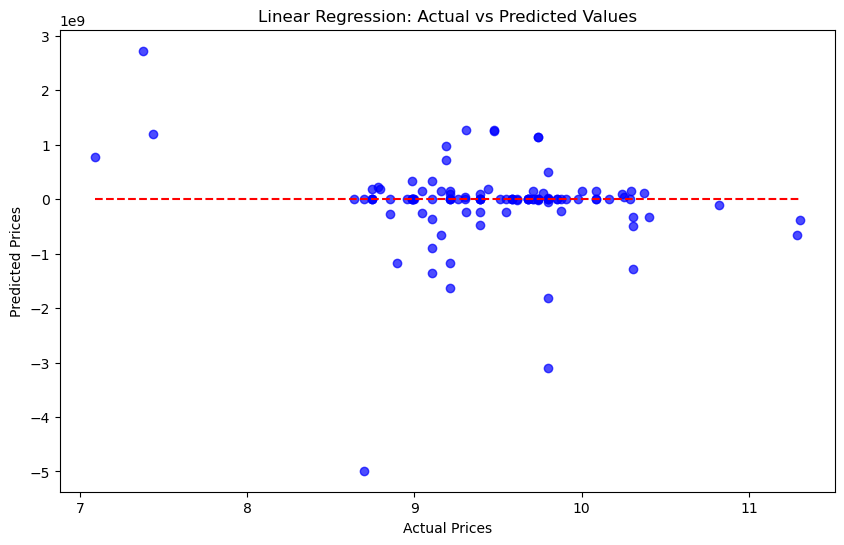

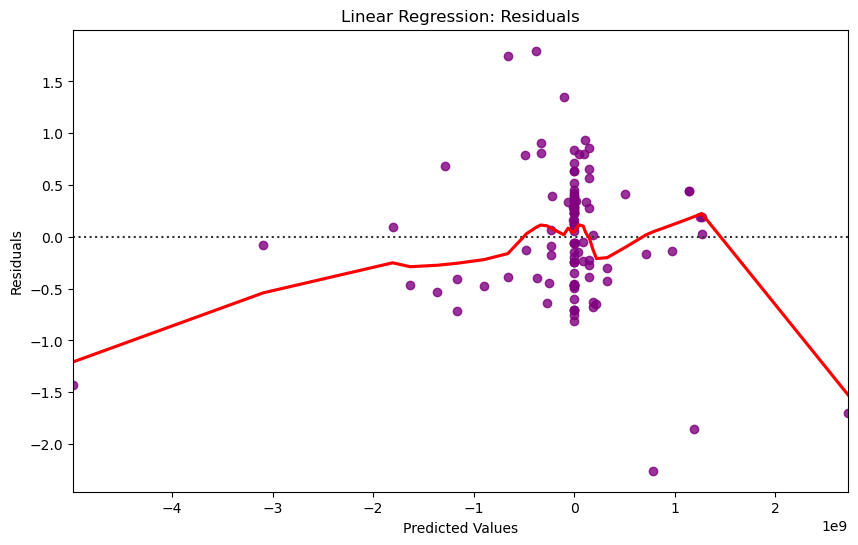

C:\Users\Latha\AppData\Local\Temp\ipykernel_4700\495877237.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='Blues_d')


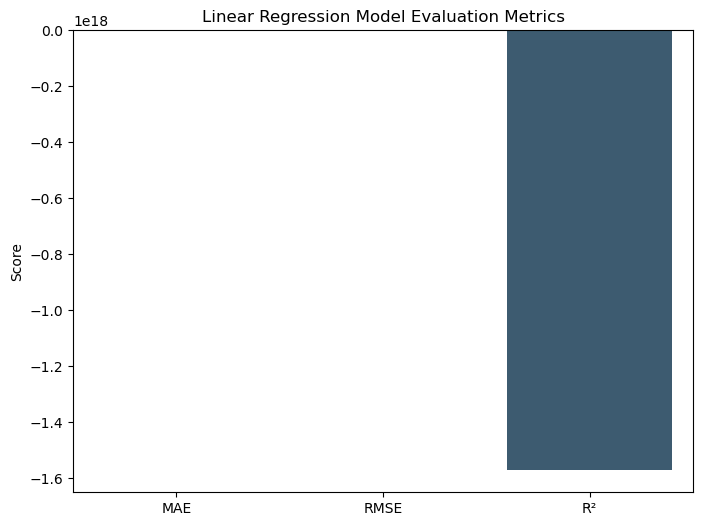

In [87]:
#Linear Regression plotting
# Plotting Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  
plt.title('Linear Regression: Actual vs Predicted Values')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Residual Plot
residuals = y_test - y_pred_lr
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_lr, y=residuals, lowess=True, color='purple', line_kws={'color': 'red'})
plt.title('Linear Regression: Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Visualizing Model Evaluation Metrics
metrics = ['MAE', 'RMSE', 'R²']
values = [mae_lr, rmse_lr, r2_lr]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values, palette='Blues_d')
plt.title('Linear Regression Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()

Random Forest Model Evaluation

In [90]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)# Predictions on test data
# Evaluate the model using MAE, RMSE, and R2
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)# Compute MSE and then calculate RMSE manually
rmse_rf = np.sqrt(mse_rf)  # Compute RMSE manually to avoid using deprecated 'squared' parameter
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print(f'Random Forest Model Evaluation:')
print(f'Mean Absolute Error (MAE): {mae_rf}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf}')
print(f'R-squared (R2): {r2_rf}')


Random Forest Model Evaluation:
Mean Absolute Error (MAE): 0.0895021058910159
Root Mean Squared Error (RMSE): 0.15543214084697105
R-squared (R2): 0.939768368860049


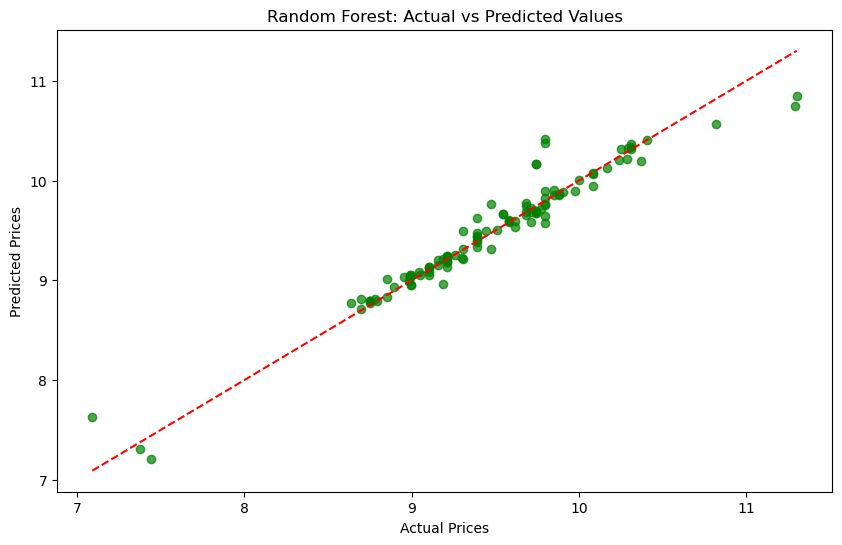

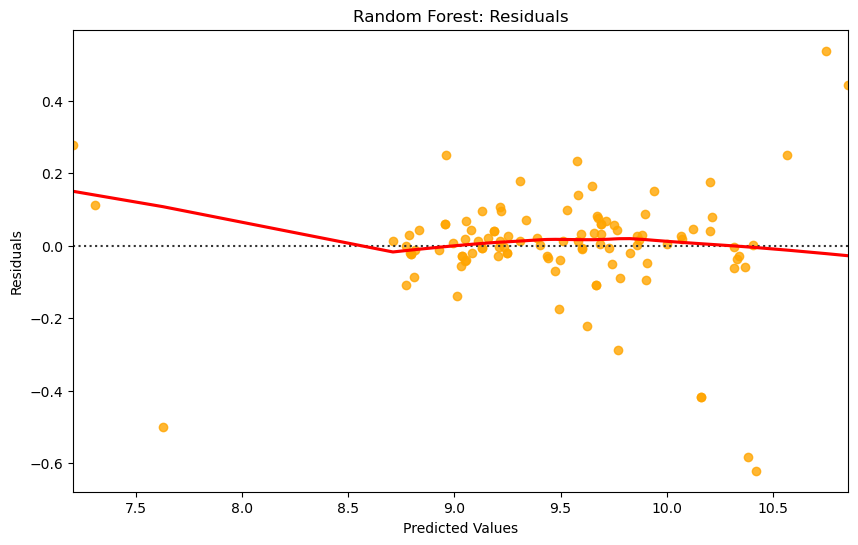

C:\Users\Latha\AppData\Local\Temp\ipykernel_4700\788067444.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_rf, y=values_rf, palette='Greens_d')


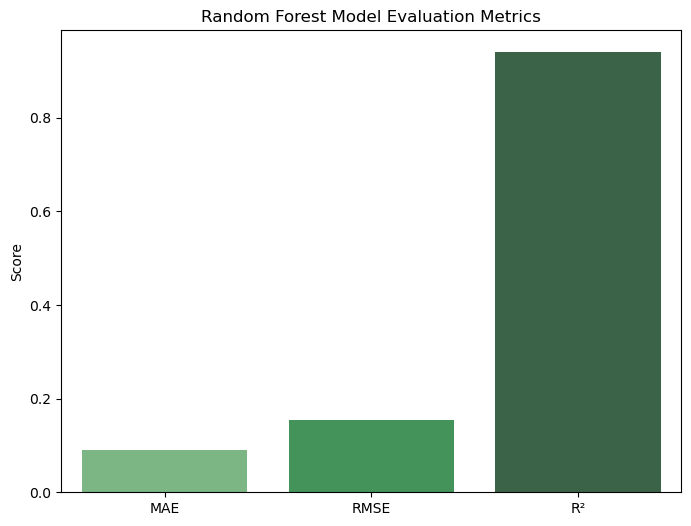

In [92]:
#Random Forest Model Visualization
#Plotting Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Identity line
plt.title('Random Forest: Actual vs Predicted Values')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Residual Plot
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_rf, y=residuals_rf, lowess=True, color='orange', line_kws={'color': 'red'})
plt.title('Random Forest: Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Visualizing Model Evaluation Metrics
metrics_rf = ['MAE', 'RMSE', 'R²']
values_rf = [mae_rf, rmse_rf, r2_rf]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics_rf, y=values_rf, palette='Greens_d')
plt.title('Random Forest Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()

Decision Tree Regression Model Evaluation

In [95]:
# Initialize the Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train) # fitting the model
y_pred = decision_tree.predict(X_test)# Predict the price on the test set
mae = mean_absolute_error(y_test, y_pred)# Evaluate the model
# Calculate RMSE without the deprecated 
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Decision Tree Regression:")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Decision Tree Regression:
Mean Absolute Error (MAE): 0.07379263027777505
Root Mean Squared Error (RMSE): 0.17170988897573256
R-squared (R2): 0.926492173479505


C:\Users\Latha\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


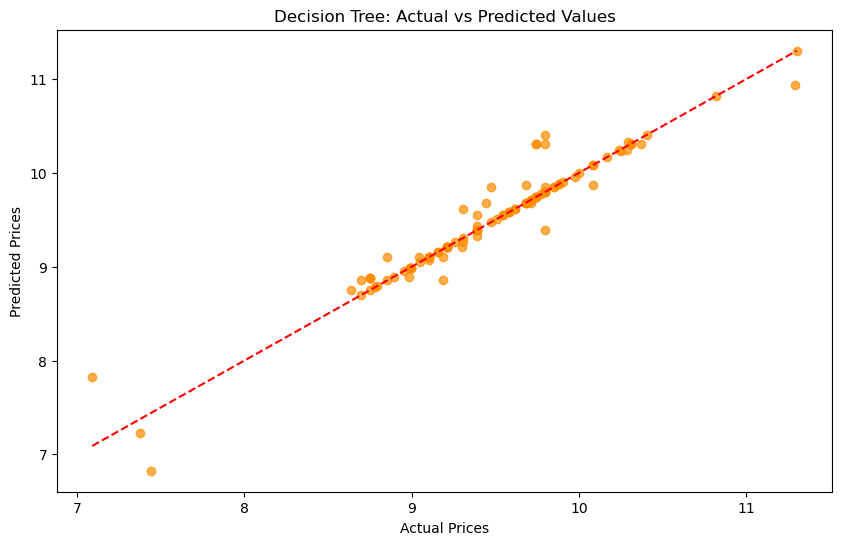

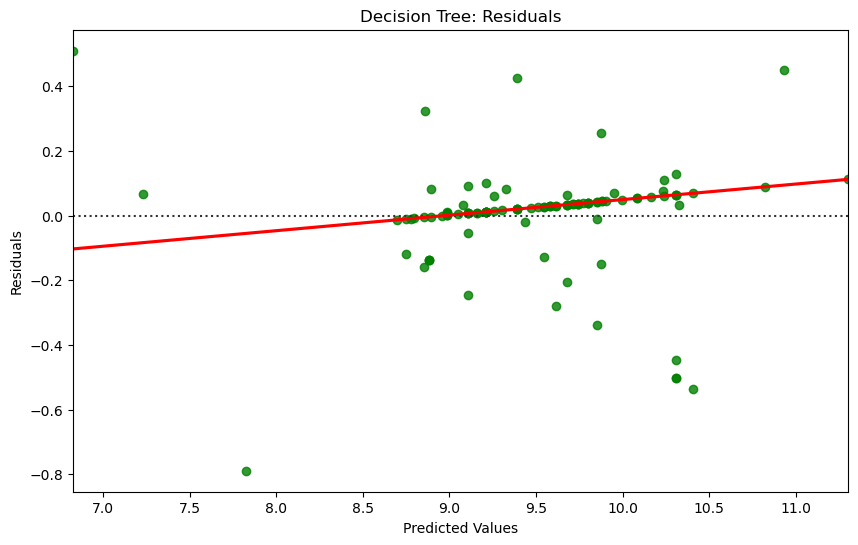

C:\Users\Latha\AppData\Local\Temp\ipykernel_4700\2433149749.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='Reds_d')


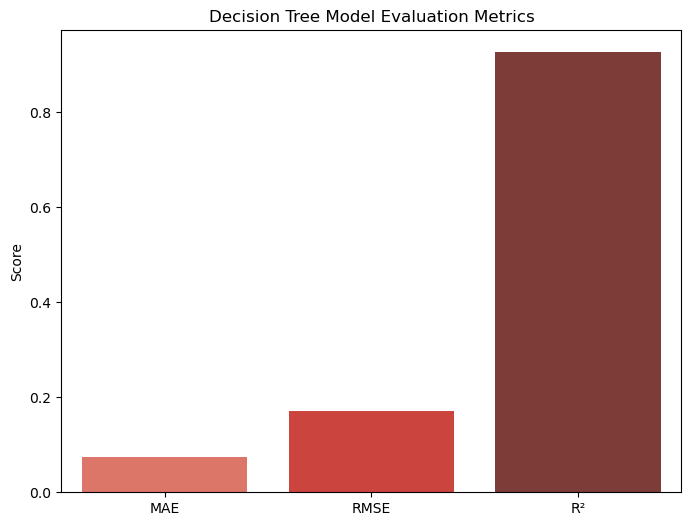

In [97]:
#Decision Tree Regression Model Visualization
#Plotting Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='darkorange', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Identity line
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

#Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='green', line_kws={'color': 'red'})
plt.title('Decision Tree: Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#Visualizing Model Evaluation Metrics
metrics = ['MAE', 'RMSE', 'R²']
values = [mae, rmse, r2]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values, palette='Reds_d')
plt.title('Decision Tree Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()

Gradient Boosting Regressor

In [100]:
from sklearn.ensemble import GradientBoostingRegressor
# Initialize Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)# Train the model
y_pred = model.predict(X_test)# Predict the target variable

# Evaluate the model
mae_gr = mean_absolute_error(y_test, y_pred)
rmse_gr = mean_squared_error(y_test, y_pred, squared=False)
r2_gr= r2_score(y_test, y_pred)

# Display the evaluation metrics
print("Gradient Boosting Regressor:")
print(f'Mean Absolute Error (MAE): {mae_gr}')
print(f'Root Mean Squared Error (RMSE): {rmse_gr}')
print(f'R-squared (R2): {r2_gr}')

Gradient Boosting Regressor:
Mean Absolute Error (MAE): 0.12583424334983823
Root Mean Squared Error (RMSE): 0.18477671806319648
R-squared (R2): 0.9148788534031975


C:\Users\Latha\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


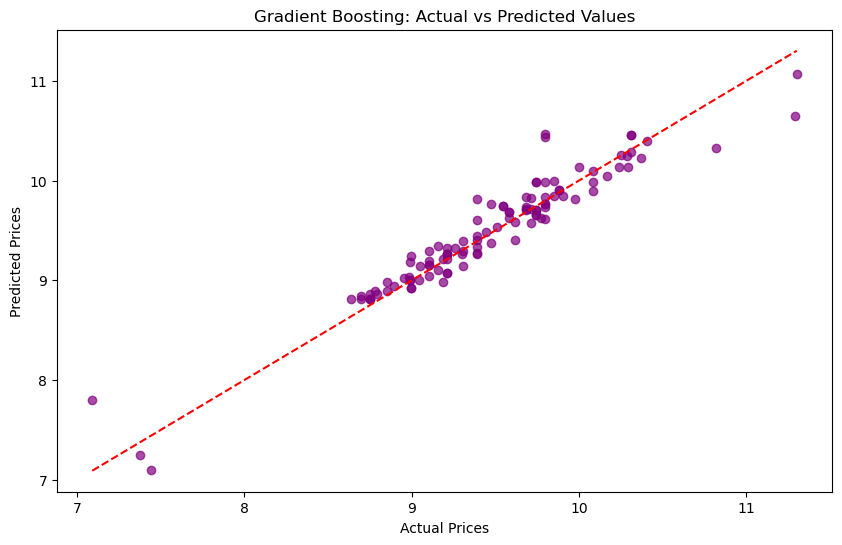

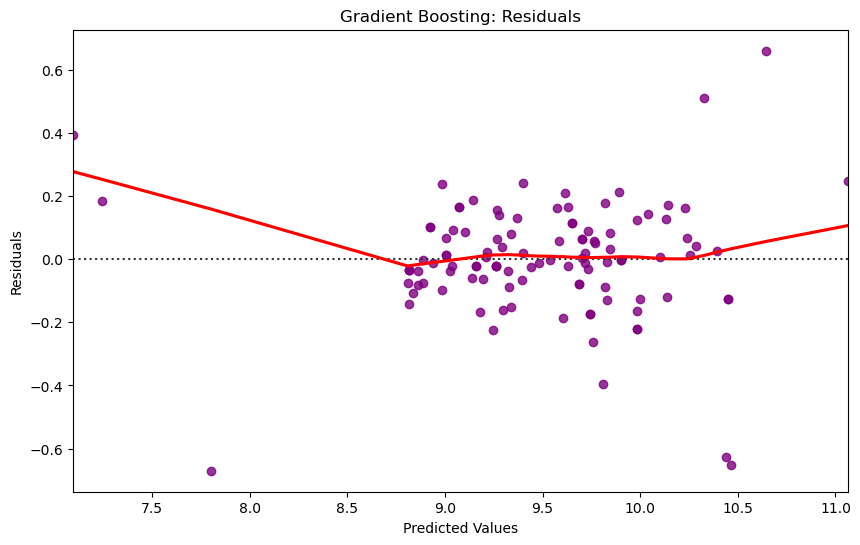

C:\Users\Latha\AppData\Local\Temp\ipykernel_4700\2835157601.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_gr, y=values_gr, palette='Purples_d')


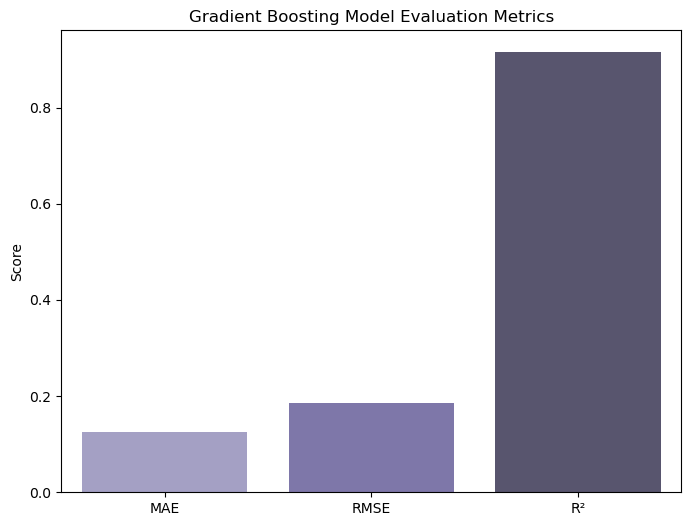

In [102]:
# Gradient Boosting Visualization
#plotting Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Identity line
plt.title('Gradient Boosting: Actual vs Predicted Values')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

#Residual Plot
residuals_gr = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals_gr, lowess=True, color='purple', line_kws={'color': 'red'})
plt.title('Gradient Boosting: Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#Visualizing Model Evaluation Metrics
metrics_gr = ['MAE', 'RMSE', 'R²']
values_gr = [mae_gr, rmse_gr, r2_gr]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics_gr, y=values_gr, palette='Purples_d')
plt.title('Gradient Boosting Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()

K-Nearest Neighbors Regressor Model 

In [105]:
from sklearn.neighbors import KNeighborsRegressor
# Initialize the K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(X_train, y_train)# Train the model
y_pred_knn = knn_model.predict(X_test)# Predict the target variable

# Evaluate the model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False) 
r2_knn = r2_score(y_test, y_pred_knn)

# Display the evaluation metrics
print("K-Nearest Neighbors Regressor:")
print(f'Mean Absolute Error (MAE): {mae_knn}')
print(f'Root Mean Squared Error (RMSE): {rmse_knn}')
print(f'R-squared (R2): {r2_knn}')

K-Nearest Neighbors Regressor:
Mean Absolute Error (MAE): 0.17114654375130792
Root Mean Squared Error (RMSE): 0.34068331997523427
R-squared (R2): 0.7106358605530385


C:\Users\Latha\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


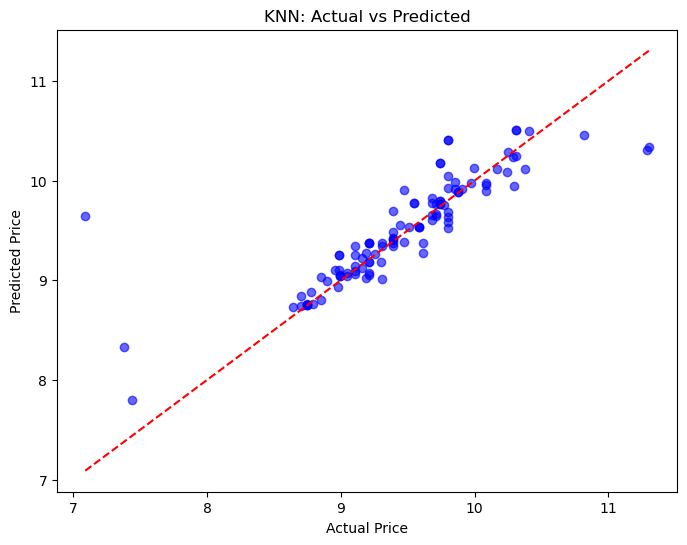

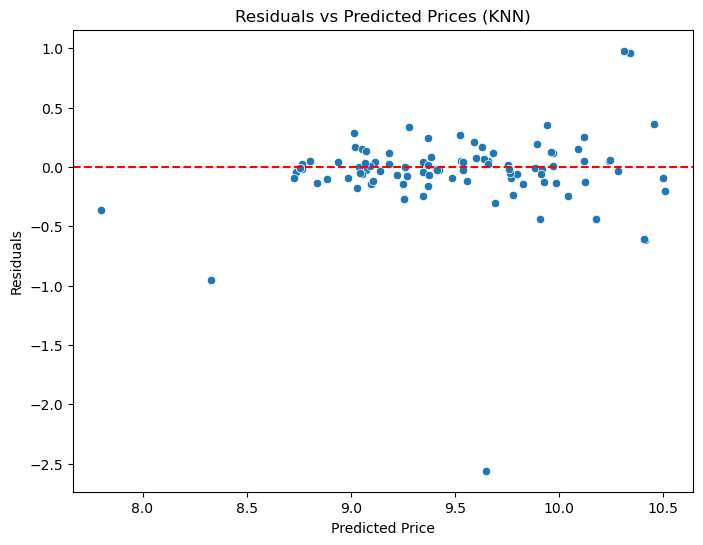

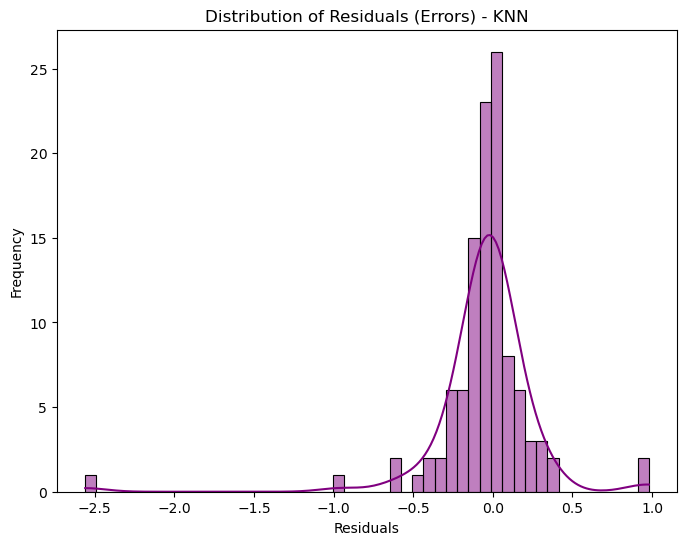

In [107]:
#K-Nearest Neighbors Regressor Visualization
# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('KNN: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Residual Plot
residuals = y_test - y_pred_knn

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_knn, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Prices (KNN)')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

#Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals (Errors) - KNN')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [120]:
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree Regression', 'Gradient Boosting', 'K-Nearest Neighbors'],
    'MAE': [mae_lr, mae_rf, mae, mae_gr, mae_knn],
    'RMSE': [rmse_lr, rmse_rf, rmse, rmse_gr, rmse_knn],
     'R²' : [r2_lr, r2_rf, r2, r2_gr, r2_knn]

})


In [124]:
# Find the best model based on different evaluation metrics (RMSE, MAE, R²)
best_rmse_model = model_comparison.loc[model_comparison['RMSE'].idxmin()]# Best Model by RMSE
best_mae_model = model_comparison.loc[model_comparison['MAE'].idxmin()]# Best Model by MAE 
best_r2_model = model_comparison.loc[model_comparison['R²'].idxmax()]# Best Model by R²

# Print the results
print("Best Model by RMSE:", best_rmse_model[['Model', 'RMSE']])
print("Best Model by MAE:", best_mae_model[['Model', 'MAE']])
print("Best Model by R²:", best_r2_model[['Model', 'R²']])

# Display the model comparison DataFrame
print("\nModel Comparison (sorted by RMSE):")
print(model_comparison)


Best Model by RMSE: Model    Random Forest
RMSE          0.155432
Name: 1, dtype: object
Best Model by MAE: Model    Decision Tree Regression
MAE                      0.073793
Name: 2, dtype: object
Best Model by R²: Model    Random Forest
R²            0.939768
Name: 1, dtype: object

Model Comparison (sorted by RMSE):
                      Model           MAE          RMSE            R²
0         Linear Regression  3.558832e+08  7.940981e+08 -1.572140e+18
1             Random Forest  8.950211e-02  1.554321e-01  9.397684e-01
2  Decision Tree Regression  7.379263e-02  1.717099e-01  9.264922e-01
3         Gradient Boosting  1.258342e-01  1.847767e-01  9.148789e-01
4       K-Nearest Neighbors  1.711465e-01  3.406833e-01  7.106359e-01


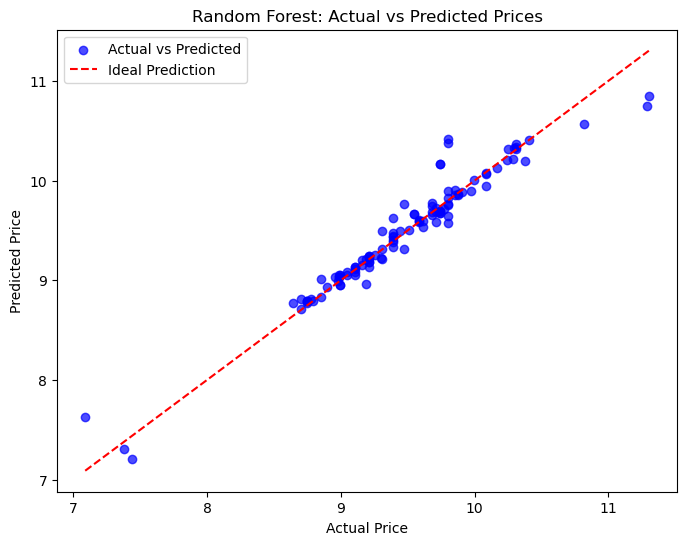

In [126]:
# Model evalution
plt.figure(figsize=(8, 6))
# Scatter plot for Actual Prices on the x-axis and Predicted Prices on the y-axis
plt.scatter(y_test, y_pred_rf, color='blue', label='Actual vs Predicted', alpha=0.7)
# Title and axis labels
plt.title('Random Forest: Actual vs Predicted Prices')
plt.xlabel('Actual Price')  # x-axis represents Actual Price
plt.ylabel('Predicted Price')  # y-axis represents Predicted Price
# Add a 45-degree line for reference (ideal prediction line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
plt.legend()
plt.show()

                                                Feature Importance Analysis

visualize the feature importances from the Random Forest model to understand which features are most important for predicting price.

In [130]:
# Assuming 'rf_model' is your trained RandomForest model
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display the sorted feature importances
print(feature_importances)


Memory                                 0.323625
Battery_                               0.234564
Mobile Height                          0.204150
RAM                                    0.079929
Front Camera_5MP                       0.027899
                                         ...   
Model_realme NARZO 50A PRIME           0.000000
Model_OPPO A17K                        0.000000
Model_Nokia G11 Plus                   0.000000
Processor__Qualcomm Snapdragon 730G    0.000000
Colour_Twilight Gold                   0.000000
Length: 612, dtype: float64


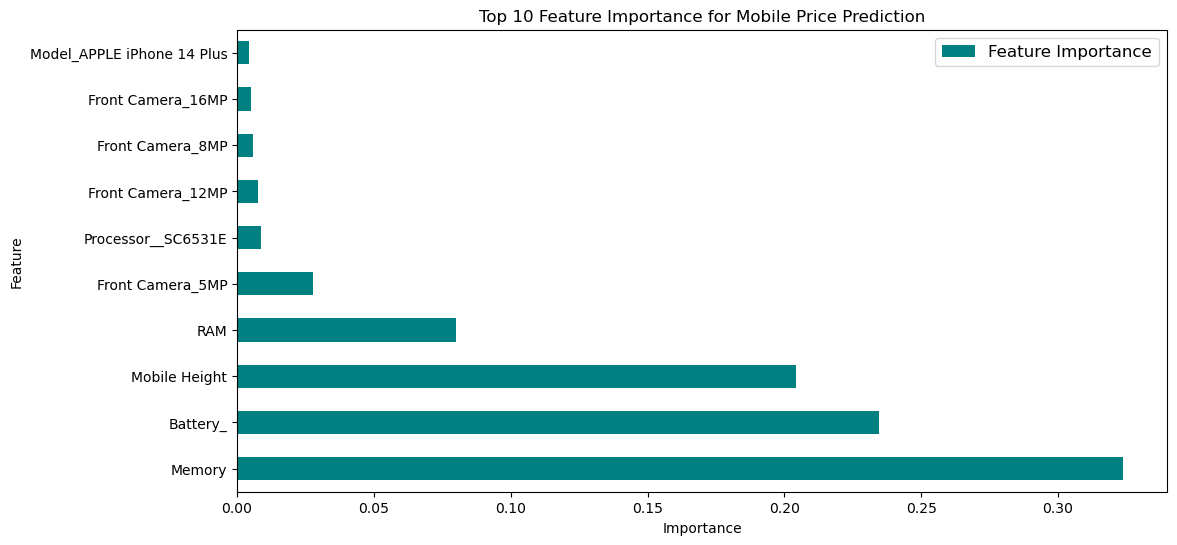

In [132]:
# Extract feature importances from the RandomForest model
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
top_10_features = feature_importances.head(10)# Select the top 10 most important features
# Create a horizontal bar plot for the top 10 feature importances
plt.figure(figsize=(12, 6))  
top_10_features.plot(kind='barh', color='teal')  
# Add titles and labels
plt.title('Top 10 Feature Importance for Mobile Price Prediction')  # Plot title
plt.xlabel('Importance')  # x-axis label
plt.ylabel('Feature')  # y-axis label
plt.legend(['Feature Importance'], loc='upper right', fontsize=12)
plt.show()

1.The horizontal bars represent the importance of each feature in predicting mobile prices.                                                             
2.Features with longer bars are more important, and those with shorter bars contribute less to the model's predictions.      
3.Understanding the features that most influence the price allows the organization to set competitive prices based on the actual demand for these features.


In [135]:
# Display top important features for pricing decisions
print(f"Top features influencing mobile phone prices: {feature_importances}")

Top features influencing mobile phone prices: Memory                                 0.323625
Battery_                               0.234564
Mobile Height                          0.204150
RAM                                    0.079929
Front Camera_5MP                       0.027899
                                         ...   
Model_realme NARZO 50A PRIME           0.000000
Model_OPPO A17K                        0.000000
Model_Nokia G11 Plus                   0.000000
Processor__Qualcomm Snapdragon 730G    0.000000
Colour_Twilight Gold                   0.000000
Length: 612, dtype: float64
